### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Twitter.data',header = None)
# As the dataset is large we will run our model on the 10% of the dataset
sampled_df = df.sample(frac=0.01,random_state=6).reset_index().iloc[:,1:]

In [4]:
X = sampled_df.iloc[:,:77]
y = sampled_df.iloc[:,77]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
import warnings
warnings.filterwarnings('ignore')
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=6)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

# <font color='purple'>Bagging

### <font color='orange'>Ridge Regression with no hyper-parameter tuning

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Ridge

In [8]:
bagging_ridge = BaggingRegressor(Ridge(), bootstrap = True,random_state=10)
scores = cross_val_score(bagging_ridge, X_train, y_train, cv = 5)
predictions = cross_val_predict(bagging_ridge, X_test, y_test, cv=  5)
accuracy = metrics.r2_score(y_test, predictions) 
bagging_ridge_report= [['Bagging - Ridge','',scores.mean(),accuracy]]
titles = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(bagging_ridge_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Bagging - Ridge,,0.950044,0.954855


### <font color='orange'>Linear Regression with no hyper-parameter tuning


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
bagging_linear = BaggingRegressor(LinearRegression(), bootstrap = True,random_state=10)
scores = cross_val_score(bagging_linear, X_train, y_train, cv = 5)
predictions = cross_val_predict(bagging_linear, X_test, y_test, cv = 5)
accuracy = metrics.r2_score(y_test, predictions) 
bagging_linear_report= [['Bagging - Linear Regression','',scores.mean(),accuracy]]
titles = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(bagging_linear_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Bagging - Linear Regression,,0.947857,0.926129


# <font color='purple'>AdaBoosting Regressor: <font color='orange'>Decision Tree Regressor

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_tree_backing = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3)
ada_boost = AdaBoostRegressor(ada_tree_backing, learning_rate=0.1, loss='square', n_estimators=1000)
ada_boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random'),
         learning_rate=0.1, loss='square', n_estimators=1000,
         random_state=None)

In [15]:
ada_train_score = ada_boost.score(X_train,y_train)
ada_test_score = ada_boost.score(X_test,y_test)

In [16]:
ada_report= [['ADA Boost - Decision Tree Regressor',ada_boost.estimators_,ada_train_score,ada_test_score]]
titles = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(ada_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,ADA Boost - Decision Tree Regressor,"[DecisionTreeRegressor(criterion='mse', max_de...",0.569796,0.578456


# <font color='purple'>AdaBoosting Regressor:<font color='orange'> Random Forest Regressor

In [17]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
rndm_rgr = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)
rfr_ada_boost = AdaBoostRegressor(rndm_rgr, learning_rate=0.1, loss='square', n_estimators=1000)
rfr_ada_boost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
         learning_rate=0.1, loss='square', n_estimators=1000,
         random_state=None)

In [18]:
rfr_ada_train_score = rfr_ada_boost.score(X_train,y_train)
rfr_ada_train_score = rfr_ada_boost.score(X_test,y_test)

In [19]:
rfr_ada_report= [['ADA Boosting - Random Forest Regressor',rfr_ada_boost.estimators_,rfr_ada_train_score,rfr_ada_train_score]]
titles = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(rfr_ada_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,ADA Boosting - Random Forest Regressor,"[(DecisionTreeRegressor(criterion='mse', max_d...",0.951775,0.951775


# <font color='purple'>Gradient Boosting Regressor

In [20]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbrt_param_grid = {'n_estimators':range(2,10),'max_depth': range(2,5),'learning_rate':[0.1,1.0,10],'random_state' : [1]}
gbrt_grid_search = GridSearchCV(GradientBoostingRegressor(),gbrt_param_grid,cv=5,return_train_score=True)
gbrt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(2, 10), 'max_depth': range(2, 5), 'learning_rate': [0.1, 1.0, 10], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
gbrt_train_score = gbrt_grid_search.score(X_train,y_train)
gbrt_test_score = gbrt_grid_search.score(X_test,y_test)

In [22]:
gbrt_report= [['Gradient Boosting Regressor',gbrt_grid_search.best_params_,gbrt_train_score,gbrt_test_score]]
titles = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(gbrt_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Gradient Boosting Regressor,"{'learning_rate': 1.0, 'max_depth': 4, 'n_esti...",0.978769,0.878573


# <font color='purple'>Applying PCA

Preserving 95% of the variance in the data

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

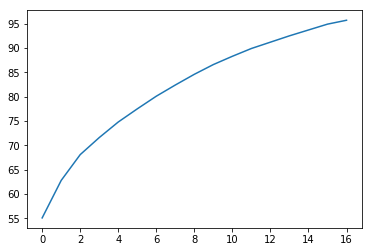

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
var=np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))
plt.plot(var)

In [25]:
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
print('Train Shape after PCA Reduction',pca_X_train.shape[1])
print('Test Shape after PCA Reduction',pca_X_test.shape[1])

Train Shape after PCA Reduction 17
Test Shape after PCA Reduction 17


# <font color='purple'> KNeighborsRegressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_param_grid = {'n_neighbors':range(2,10)}
knn_grid_search = GridSearchCV(KNeighborsRegressor(),knn_param_grid,cv=5,return_train_score=True)
knn_grid_search.fit(pca_X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [27]:
knn_train_score = knn_grid_search.score(pca_X_train,y_train)
knn_test_score = knn_grid_search.score(pca_X_test,y_test)

In [28]:
knn_report= [['KNeighborsRegressor',knn_grid_search.best_params_,knn_train_score,knn_test_score]]
titles = ['Model','Hyper Parameter','Train Score','Test Score']
pd.DataFrame(knn_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,KNeighborsRegressor,{'n_neighbors': 3},0.87088,0.809236


# <font color='purple'>Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lreg_param_grid={'n_jobs':[-1]}
lreg_grid_search = GridSearchCV(LinearRegression(),param_grid=lreg_param_grid,cv=5,return_train_score=True)
lreg_grid_search.fit(pca_X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
lreg_train_score = round(lreg_grid_search.score(pca_X_train, y_train),5)
lreg_test_score = round(lreg_grid_search.score(pca_X_test, y_test),5)

In [31]:
lreg_report = [['LinearRegression','',lreg_train_score,lreg_test_score]]
pd.DataFrame(lreg_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,LinearRegression,,0.93342,0.94901


# <font color='purple'> SGDRegressor

In [32]:
from sklearn.linear_model import SGDRegressor
param_grid={'max_iter':[10,100,1000,10000],'learning_rate':['optimal'],'penalty':['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(),param_grid,cv=5,return_train_score=True)
grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [10, 100, 1000, 10000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
sgd_train_score = grid_search.score(pca_X_train,y_train)
sgd_test_score = grid_search.score(pca_X_test,y_test)
param = grid_search.best_params_

In [34]:
sgd_report = [['SGDRegressor',param,sgd_train_score,sgd_test_score]]
pd.DataFrame(sgd_report, columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,SGDRegressor,"{'learning_rate': 'optimal', 'max_iter': 10000...",0.933373,0.948287


# <font color='purple'>Ridge

In [35]:
from sklearn.linear_model import Ridge
ridge_train_array = []
ridge_test_array = []

In [36]:
param_grid={'alpha':[0.01,0.1,1,10,100]}
ridge_grid_search = GridSearchCV(Ridge(),param_grid=param_grid,cv=5,return_train_score=True)
ridge_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [37]:
ridge_train_score = ridge_grid_search.score(pca_X_train,y_train)
ridge_test_score = ridge_grid_search.score(pca_X_test,y_test)
ridge_param = ridge_grid_search.best_params_

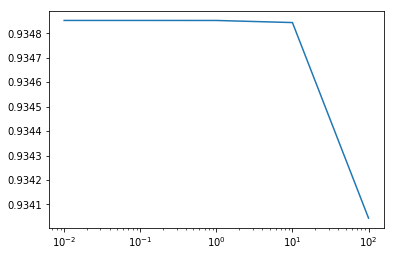

In [38]:
ridge_param_values = [dict['alpha'] for dict in ridge_grid_search.cv_results_['params']]
plt.plot(ridge_param_values,ridge_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')

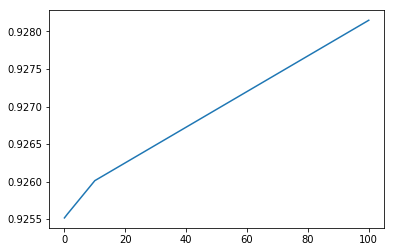

In [39]:
plt.plot(ridge_param_values,ridge_grid_search.cv_results_['mean_test_score'])

In [40]:
ridge_report = [['Ridge',ridge_param,ridge_train_score,ridge_test_score]]
pd.DataFrame(ridge_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Ridge,{'alpha': 100},0.932952,0.949146


# <font color='purple'>Lasso

In [41]:
from sklearn.linear_model import Lasso
param_grid={'alpha':[0.01,0.1,1,10,100]}
lasso_grid_search = GridSearchCV(Lasso(),param_grid=param_grid,cv=5,return_train_score=True)
lasso_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [42]:
lasso_train_score = lasso_grid_search.score(pca_X_train,y_train)
lasso_test_score = lasso_grid_search.score(pca_X_test, y_test)
lasso_param = lasso_grid_search.best_params_

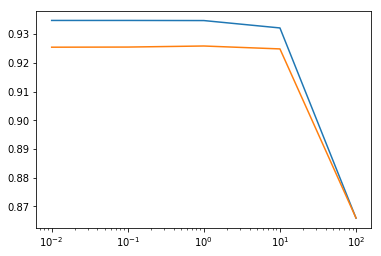

In [43]:
lasso_param_values = [dict['alpha'] for dict in lasso_grid_search.cv_results_['params']]
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_test_score'])

In [44]:
lasso_report = [['Lasso',lasso_param,lasso_train_score,lasso_test_score]]
pd.DataFrame(lasso_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Lasso,{'alpha': 1},0.933381,0.948865


# <font color='purple'>Linear SVR

In [45]:
from sklearn.svm import LinearSVR
param_grid={'C':[0.01,0.1,1,10,100]}
lsvr_grid_search = GridSearchCV(LinearSVR(),param_grid,cv=5,return_train_score=True)
lsvr_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [46]:
lsvr_train_score = lsvr_grid_search.score(pca_X_train,y_train)
lsvr_test_score = lsvr_grid_search.score(pca_X_test,y_test)
lsvr_params = lsvr_grid_search.best_params_

In [47]:
lsvr_report = [['Linear SVR',lsvr_params,lsvr_train_score,lsvr_test_score]]
pd.DataFrame(lsvr_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Linear SVR,{'C': 100},0.922591,0.929483


# <font color='purple'>RBF SVR

In [56]:
from sklearn.svm import SVR
param_grid={'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10,100]}
rbfsvr_grid_search = GridSearchCV(SVR(kernel='rbf'),param_grid,cv=5,return_train_score=True)
rbfsvr_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
rbfsvr_train_score = rbfsvr_grid_search.score(pca_X_train,y_train)
rbfsvr_test_score = rbfsvr_grid_search.score(pca_X_test,y_test)
rbfsvr_params = rbfsvr_grid_search.best_params_

In [ ]:
param_grid={'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10,100], 'degree':[2,3]}
polysvr_grid_search = GridSearchCV(SVR(kernel='poly'),param_grid,cv=5,return_train_score=True)
polysvr_grid_search.fit(X_train,y_train)

In [ ]:
polysvr_train_score = polysvr_grid_search.score(X_train,y_train)
polysvr_test_score = polysvr_grid_search.score(X_test,y_test)
polysvr_params = polysvr_grid_search.best_params_

In [ ]:
polysvr_report = [['Poly SVR',polysvr_params,polysvr_train_score,polysvr_test_score]]
pd.DataFrame(polysvr_report,columns=titles)

# <font color='purple'>Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly',PolynomialFeatures()),('lreg',LinearRegression())])
param_grid = {'poly__degree':[2,3]}
poly_grid_search = GridSearchCV(pipe,param_grid=param_grid,cv=5,return_train_score=True)
poly_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [2, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [49]:
poly_train_score = poly_grid_search.score(X_train,y_train)
poly_test_score = poly_grid_search.score(X_test,y_test)
poly_param = poly_grid_search.best_params_

In [50]:
poly_report = [['Polynomial Regression',poly_param,poly_train_score,poly_test_score]]
pd.DataFrame(poly_report,columns=titles)

,Model,Hyper Parameter,Train Score,Test Score
0,Polynomial Regression,{'poly__degree': 3},1.0,-6.025148e+09


In [51]:
from IPython.display import display, HTML
pd.options.display.float_format = '{:.4f}'.format
# final_report = pd.DataFrame(knn_report+lreg_report+sgd_report+ridge_report+lasso_report+poly_report+lsvr_report+polysvr_report,columns=titles,index=range(1,9))
final_report = pd.DataFrame(knn_report+lreg_report+poly_report+sgd_report+ridge_report+lasso_report+lsvr_report,columns=titles,index=range(1,8))

final_report

,Model,Hyper Parameter,Train Score,Test Score
1,KNeighborsRegressor,{'n_neighbors': 3},0.8709,0.8092
2,LinearRegression,,0.9334,0.9490
3,Polynomial Regression,{'poly__degree': 3},1.0000,-6025148477.0686
4,SGDRegressor,"{'learning_rate': 'optimal', 'max_iter': 10000...",0.9334,0.9483
5,Ridge,{'alpha': 100},0.9330,0.9491
6,Lasso,{'alpha': 1},0.9334,0.9489
7,Linear SVR,{'C': 100},0.9226,0.9295


Scores without PCA (below)

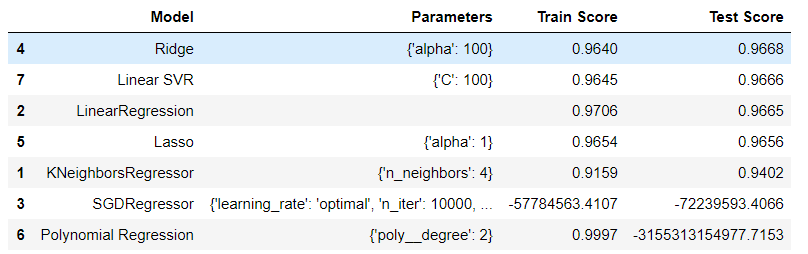

We see here that the scores for regression is better without PCA. This could be beacuse we could be losing important information by doing PCA.